In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [3]:
ds_co = pd.read_csv('Transformed Data/Transformed_Co', index_col = 0)
ds_pt = pd.read_csv('Transformed Data/Transformed_Pt' , index_col = 0)


In [4]:
ds_co.shape

(92, 133)

In [5]:
# ds_co = ds_co.iloc[:, 1:-2]
# ds_pt = ds_pt.iloc[:, 1:-2]

In [6]:
# poly = PolynomialFeatures(degree=2)
# ds_co_poly = poly.fit_transform(ds_co)
# ds_pt_poly = poly.fit_transform(ds_pt)
ds_co_poly = ds_co
ds_pt_poly = ds_pt


In [8]:
# poly.get_feature_names(ds_co.columns)[150]

<IPython.core.display.Javascript object>


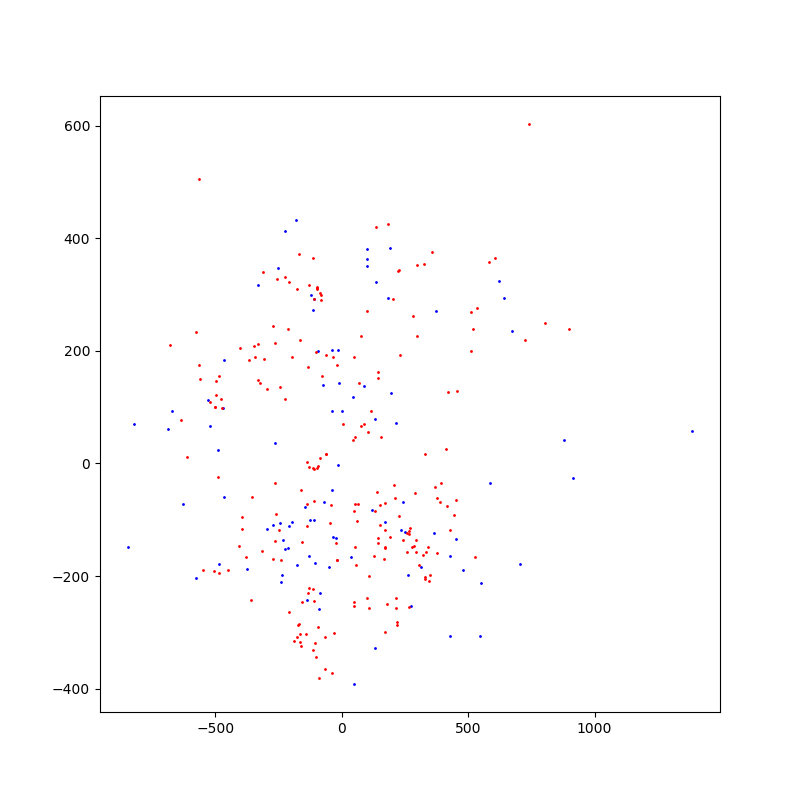

In [9]:
fig1, subaxes = plt.subplots(1, 1, figsize=(8,8))

pca1 = decomposition.PCA(n_components=2)
ds_co_poly_pca = pca1.fit_transform(ds_co_poly)
ds_pt_poly_pca = pca1.fit_transform(ds_pt_poly)
# ds_co_poly_pca = pca.transform(ds_co_poly)
subaxes.scatter(ds_co_poly_pca[:, 0], ds_co_poly_pca[:, 1],  c='blue' ,s=1)
subaxes.scatter(ds_pt_poly_pca[:, 0], ds_pt_poly_pca[:, 1],  c='red' ,s=1)


In [28]:
ds_co_poly_pca.shape

(1012740, 2)

In [29]:
df_co = pd.DataFrame(ds_co_poly_pca)
df_pt = pd.DataFrame(ds_pt_poly_pca)


In [30]:
df_pca1 = pd.DataFrame(pca1.components_)
df_pca1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.241212,-0.242524,-0.204856,-0.317515,-0.165283,-0.298550,-0.333138,-0.128304,0.235929,0.239978,0.215269,0.333778,0.163854,0.283451,0.318901,0.128191
1,0.393323,0.292935,0.243691,-0.047907,-0.052494,-0.222555,-0.308301,-0.173641,-0.410053,-0.294831,-0.254306,0.058869,0.060757,0.224953,0.337038,0.170948


In [31]:
pd.DataFrame(pca1.components_).apply((lambda x: x.max()), axis=1)

0    0.333778
1    0.393323
dtype: float64

In [32]:
pd.DataFrame(pca1.components_).apply((lambda x: x.argmax()), axis=1)

0    11
1     0
dtype: int64

In [33]:
pca1.explained_variance_

array([ 41273.48733625,  23733.56174361])

<IPython.core.display.Javascript object>


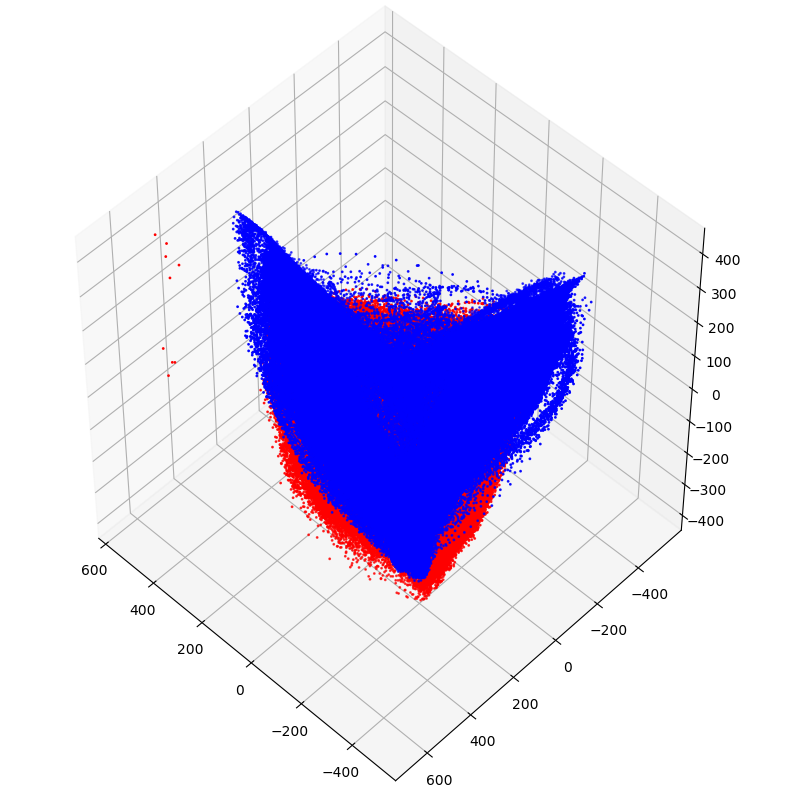

In [34]:
fig = plt.figure(figsize=(8,8))

subaxes1 = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
pca = decomposition.PCA(n_components=3)
ds_co_poly_pca2 = pca.fit_transform(ds_co_poly)
ds_pt_poly_pca2 = pca.fit_transform(ds_pt_poly)

subaxes1.scatter(ds_co_poly_pca2[:, 0], ds_co_poly_pca2[:, 1], ds_co_poly_pca2[:, 2],  c='blue' ,s=1)
subaxes1.scatter(ds_pt_poly_pca2[:, 0], ds_pt_poly_pca2[:, 1], ds_pt_poly_pca2[:, 2],  c='red' ,s=1)



In [35]:
print(pca.explained_variance_ )

[ 41273.48733625  23733.56174361  11807.65672842]


In [36]:
ds_co.shape

(1012740, 16)

In [38]:
df_co.to_csv('PCA/PCA_Co_final.csv')
df_pt.to_csv('PCA/PCA_Pt_final.csv')

In [39]:
df_pca1.to_csv('Significant2d/final.csv')